<a href="https://colab.research.google.com/github/sierrajulietromeo/geopandas_playing/blob/master/Copy_of_Map_of_London.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install geopandas

    100% |████████████████████████████████| 901kB 7.3MB/s 
    100% |████████████████████████████████| 17.9MB 1.6MB/s 
    100% |████████████████████████████████| 1.5MB 15.3MB/s 
    100% |████████████████████████████████| 4.4MB 8.4MB/s 
    100% |████████████████████████████████| 81kB 23.2MB/s 
  Running setup.py bdist_wheel for pyproj ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/89/77/ec/a537585d1022dafde0317dd19d33c4a30d4ee61e19f25ebd8e
  Running setup.py bdist_wheel for munch ... - done
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d9264

In [0]:
!pip install descartes

In [0]:
import geopandas as gpd
# set the filepath and load in a shapefile
fp = "London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head(10)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.9 181459.8, 549894.6 181465.7..."
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510615.2 191591.3..."
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510660 191690.9, ..."
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201 182512.6, 525181.5 182521.1, ..."
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.9 198355.2, 524594.3 198321.4..."


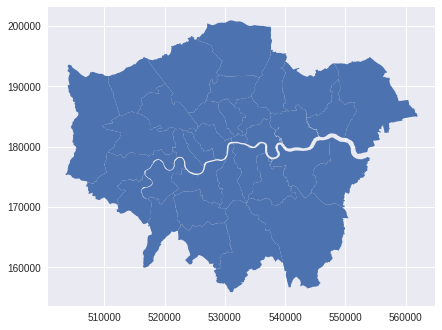

In [0]:
map_df.plot()

In [0]:
import pandas as pd
df = pd.read_csv("BoAdataset1Data.csv", header=0)
df.head()

,Borough,InnerOuter,Population,Households,Area,Density,Age,LT15,WorkAge,Over65,...,Happy,Anxiety,CObesity,Diabetes,PMortality,PControl,Conservative,Labour,Libdem,Turnout
0,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,9.7,...,7.1,3.1,28.5,7.3,228,Lab,0.0,100.0,0.0,36.5
2,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,14.0,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,16.6,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0.0,39.6
4,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,11.3,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [0]:
df = df[['Borough', 'Over65']]
df.head()

,Borough,Over65
0,City of London,15.5
1,Barking and Dagenham,9.7
2,Barnet,14.0
3,Bexley,16.6
4,Brent,11.3


In [0]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('NAME').join(df.set_index('Borough'))

#merged.head(10)
#merged.columns

#merged.info()
merged.reset_index(inplace=True)

In [0]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
NAME          33 non-null object
GSS_CODE      33 non-null object
HECTARES      33 non-null float64
NONLD_AREA    33 non-null float64
ONS_INNER     33 non-null object
SUB_2009      0 non-null object
SUB_2006      0 non-null object
geometry      33 non-null object
Over65        33 non-null float64
dtypes: float64(3), object(6)
memory usage: 2.4+ KB


In [0]:
import matplotlib.pyplot as plt

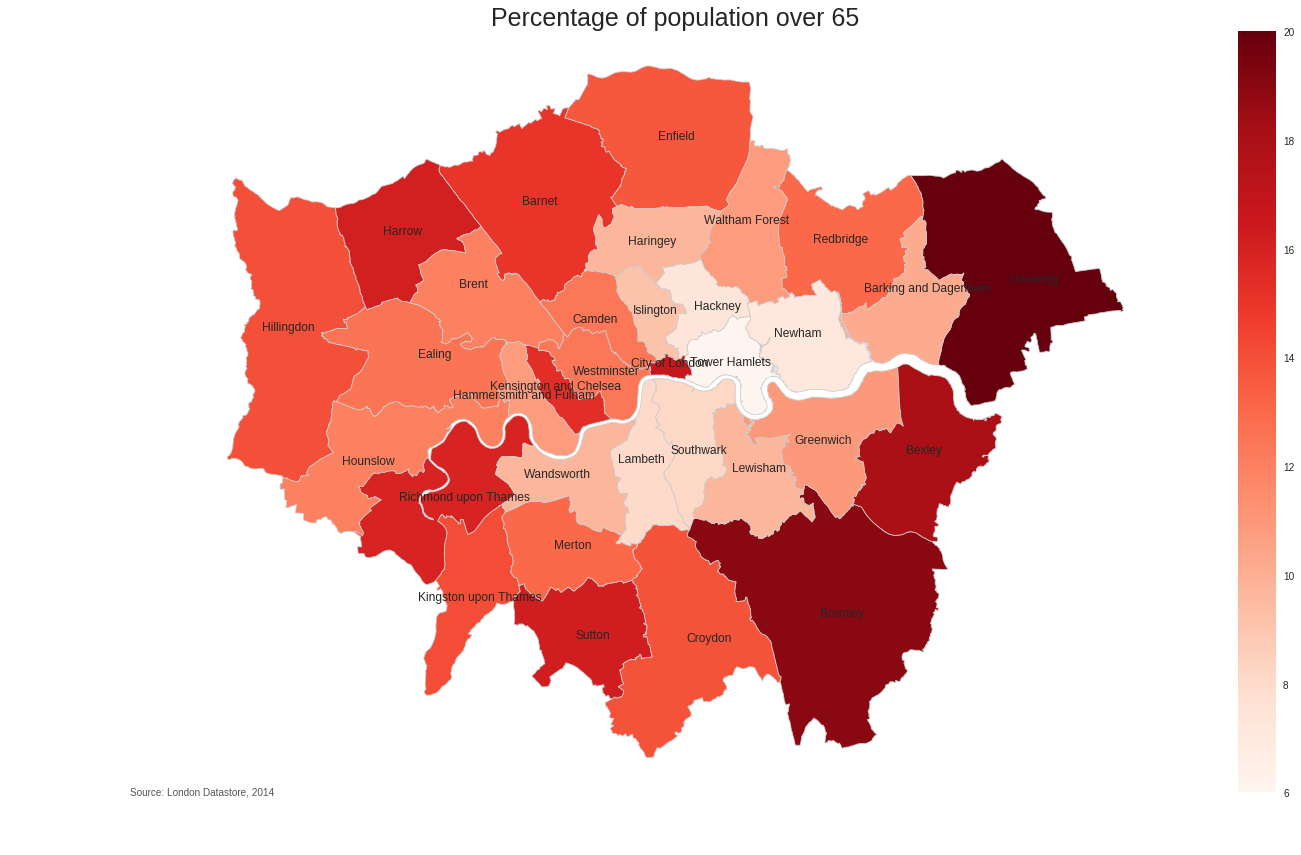

In [0]:
# set a variable that will call whatever column we want to visualise on the map
#variable = 'pop_density_per_hectare'
variable = 'Over65'

# set the range for the choropleth
vmin, vmax = 6, 20

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(25, 14))

merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

#merged.head()


# create map
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')


# Now we can customise and add annotations

for idx, row in merged.iterrows():
    plt.annotate(s=row['NAME'], xy=row['coords'],
                 horizontalalignment='center')




# remove the axis
ax.axis('off')

# add a title
ax.set_title('Percentage of population over 65', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: London Datastore, 2014',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)
